In [1]:
import numpy as np
import pandas as pd 
import scipy as sp

from scipy import linalg as lg
from scipy import integrate
from scipy.optimize import curve_fit
from scipy.spatial import distance


from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

import sys
import matplotlib
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
%matplotlib nbagg

# Distancia fisica, resultado en pc

In [85]:
#Parametro de Hubble
def HubbleI(z):
    #Constantes
    #H0 = 100e3
    H0 = 67.74e3                         #Cte de Hubble hoy en m/s*Mpc,Plank
    Ok = 0.0                             #Omega de k, se asume universo plano
    Om = 0.3089                          #Omega de la materia
    Ol =  1 - Om                         #Omega de la cte cosmologica
    
    #De las ecuaciones de Frieddman H(z) 
    h2 = H0*( Om*(1 + z)**3.0 + Ok*(1 + z)**2.0 + Ol )**0.5
    
    #Se retorna el valor necesario para la dist comovil
    return 1.0/h2

#Distancia comovil
def Dist_com(z):
    #Fisica, C es la velocidad de la luz (m/s)
    C = 299792458.0
    #C = 3e8
    
    #Distancia comovil (en Mpc pues H es Km/sMpc)
    dist_com = C*sp.integrate.quad(HubbleI,0.0,z)[0]
    
    #En pc
    return dist_com*1e6


#Distancia fisica con el redshift
def Dist_fz(z):
    #Fisica, C es la velocidad de la luz (m/s)
    C = 299792458.0
    #C = 3e8
    
    #Distancia comovil
    dist_com = C*sp.integrate.quad(HubbleI,0.0,z)[0]
    
    #Factor de escala
    a = 1.0/(1.0 + z)
    
    #Distancia fisica
    #dist_fis = dist_com/a
    dist_fis = dist_com*a
    
    #Se retorna valor en pc's
    return dist_fis*1e6

#Distancia usando el modulo de la distancia, resultado en pc's
def Dist_fm(mu):
    dist = 10**(mu/5.0 + 1.0)
    return dist

# Calculos con la velocidad

In [86]:
#Calculo de la componente de la velocidad visible a nosotros
#Hubble Trouble or Hubble bubble
#Dl es el valor teorico calculado con z, Dl_ el calculado co dist mod.
def vel(Dl,Dl_,z):
    #C es la velocidad de la luz (m/s)
    C = 299792458.0
    return C*np.array(z)*( 1.0 - np.array(Dl)/np.array(Dl_) )

# Clustering

In [87]:
#Metodo de ELbow para determinar el numero de clusters
def Elbow_method(dats,n):
    Elbow = []
    Clust = []
    for i in xrange(2,n):
        #print i
        clustering = KMeans(n_clusters=i).fit(dats.reshape(-1,1))
        Elbow.append(clustering.inertia_)
        Clust.append(i)
        
    #Grafico
    plt.figure(figsize=(7,7))
    plt.plot(Clust,Elbow)
    plt.xlabel('Clusters number')
    plt.ylabel('Inertia (withinss)')
    plt.title('Determining the number of clusters')
    plt.grid()
    
    return #[Elbow,Clust]

In [88]:
#Grafica de los clusters
def graph_clusters(coord_,clusters_,op):
   
    fig = plt.figure(figsize=(7,7))
    ax = Axes3D(fig)
    
    #Los colores varian de 0 a 9
    col = ['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9']
    
    #Coordenadas a graficar
    X_ = coord_[0]
    Y_ = coord_[1]
    Z_ = coord_[2]
    
    if op==0:
        #Seleciona color para cada cluster
        for j in xrange(len(clusters_)):
            for i in xrange(max(clusters_)+1):
                if clusters_[j]==i:
                    ax.plot([X_[j]],[Y_[j]],[Z_[j]],'.',color=col[i])
     
    
    #Hace uso de scatter para graficar
    #Toma como color el id de cada punto usando c para dar color
    if op==1:
        ax.scatter3D(X_,Y_,Z_,c=clusters_,s=15)
        
    #Etiqueta grafico
    ax.plot([0],[0],[0],'*')
    ax.set_title('Each color is a cluster')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    #ax.set_xlim(-0.01,0.01)
    #ax.set_ylim(-0.05,0.05)
    #ax.set_zlim(-0.02,0.02)
        
    return None

# Para Union21

In [89]:
#Datos de Union 2.1
"""
DEC = np.loadtxt('DEC_union21.txt')
ACR = np.loadtxt('RA_union21.txt')
z_union = np.loadtxt('z_union21.txt')
dist_mod_union = np.loadtxt('dist_mod_union21.txt')
len(DEC),len(ACR),len(z_union),len(dist_mod_union)
"""
#"""Este es el que tiene todos los datos, con error en el modulo de la distancia
DEC = np.load('DEC_ult.npy')
ACR = np.load('RAC_ult.npy')
z_union = np.load('RedZ_ult.npy')
dist_mod_union = np.load('Dmod_ult.npy')
dist_mod_unionE = np.load('DmoE_ult.npy')
#"""
len(DEC),len(ACR),len(z_union),len(dist_mod_union)

#a = -1
#ACR[a],DEC[a],z_union[a],dist_mod_union[a]

(288, 288, 288, 288)

In [90]:
#Calculo de la distancia fisica usando red shift y modulo de la distancia
dist_z_union21 = []
dist_mu_union21= []

for i in xrange(len(z_union)):
    dist_z_union21.append(Dist_fz(z_union[i]))
    dist_mu_union21.append(Dist_fm(dist_mod_union[i]))

#len(dist_z_union21),len(dist_z_union21)

<IPython.core.display.Javascript object>


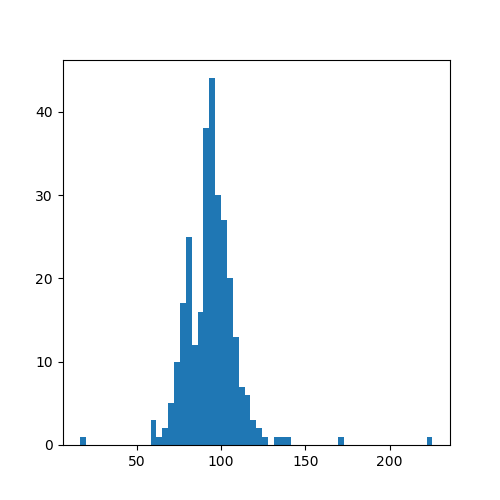

In [91]:
npr = 2
prs = [100*dist_z_union21[i]/dist_mu_union21[i] for i in xrange(len(dist_mu_union21))] 
plt.figure(figsize=(5,5))
hprs=plt.hist(prs,60)

Transformacion de coordenadas. Se toman la RA, DEC y el redshift como similares a las coordenadas 
esfericas para poderlas graficar en el cielo. La RA es la coordenada azimutal, la DEC la polar y el
redshift se asume como la radial.

In [92]:
#Se transforman las coordenadas de DEC a unas en esfericas en radianes
DEC_t = []
ACR_t = []

#Para convertir a radianes
conv = np.pi/180.0

for i in xrange(len(DEC)):
    #Segun el hemisferio se debe transformar:
    #Hemisferio Norte
    if DEC[i]>0: DEC_t.append( (90-DEC[i])*conv )
        
    #Hemisferio Sur
    if DEC[i]<0: DEC_t.append( (90+abs(DEC[i]))*conv )
    ACR_t.append(ACR[i]*conv)
    
#max(DEC_t),min(DEC_t),max(ACR_t),min(ACR_t)
np.savetxt('decE.txt',DEC_t,fmt='%.7f')
np.savetxt('acrE.txt',ACR_t,fmt='%.7f')

In [93]:
#Transformando la posicion de las entrellas a cartesianas
#r = 1.0
#r = np.array(dist_z_union21)
r =  np.array(z_union)


Xs = r*np.sin(np.array(DEC_t))*np.cos(np.array(ACR_t))
Ys = r*np.sin(np.array(DEC_t))*np.sin(np.array(ACR_t))
Zs = r*np.cos(np.array(DEC_t))

"""
Xs = r*np.sin(np.array(DEC)*conv)*np.cos(np.array(ACR)*conv)
Ys = r*np.sin(np.array(DEC)*conv)*np.sin(np.array(ACR)*conv)
Zs = r*np.cos(np.array(DEC)*conv)
"""
len(Ys)

288

<IPython.core.display.Javascript object>


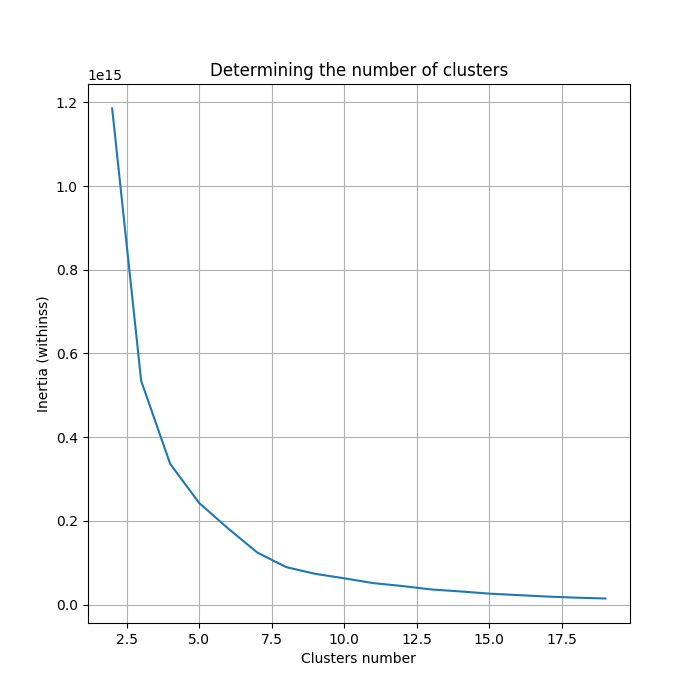

In [94]:
#Calculo de la componente radial de la velocidad en m/s
Vel_union21 = vel(dist_z_union21,dist_mu_union21,z_union)

np.savetxt('velocidades_union21.txt',Vel_union21)
#Calculo del numero de clusters
Elbow_method(Vel_union21,20)

<IPython.core.display.Javascript object>


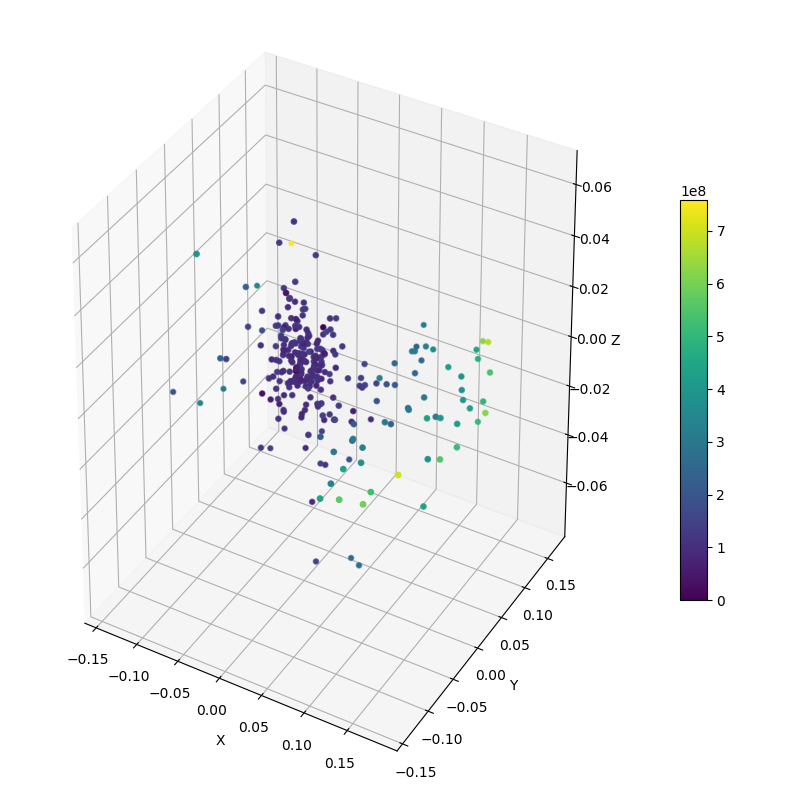

In [95]:
#Grafico de la velocidad con un degrade en el color
#El "orden del degrade se puede ver en el segundo grafico de abajo"

#markersize=(abs(Vel_union21[i]))*200
cm = plt.get_cmap("RdYlGn")
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)

#Asignacion de colores:
Col = []
for i in xrange(len(Vel_union21)):
    C0 = Vel_union21[i]-min(Vel_union21)
    Col.append( (30*C0) )

vel_plot = ax.scatter3D(Xs,Ys,Zs,'*',c=Col,s=15)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

#Barra de colores
fig.colorbar(vel_plot, shrink=0.5, aspect=15)

#min(Vel_union21)

<IPython.core.display.Javascript object>


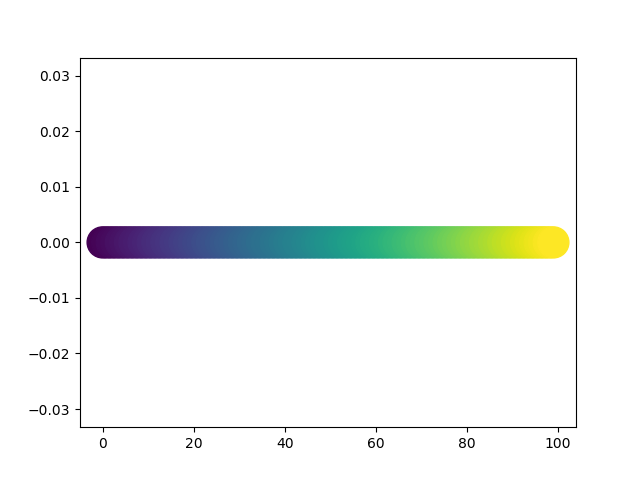

In [13]:
#Vista de como aumenta el color (para distinguir bajas velocidades con altas)
fig = plt.figure()
n = 100
x = np.arange(n)
y = np.zeros(n)
colors = np.arange(n)
plt.scatter(x,y,s=500, c=colors)

In [14]:
"""
Segun el metodo de Elbow se hacen 6 clusters
"""
max(Vel_union21), min(Vel_union21)

(9470305.2671940327, -9274606.3945274949)

<IPython.core.display.Javascript object>


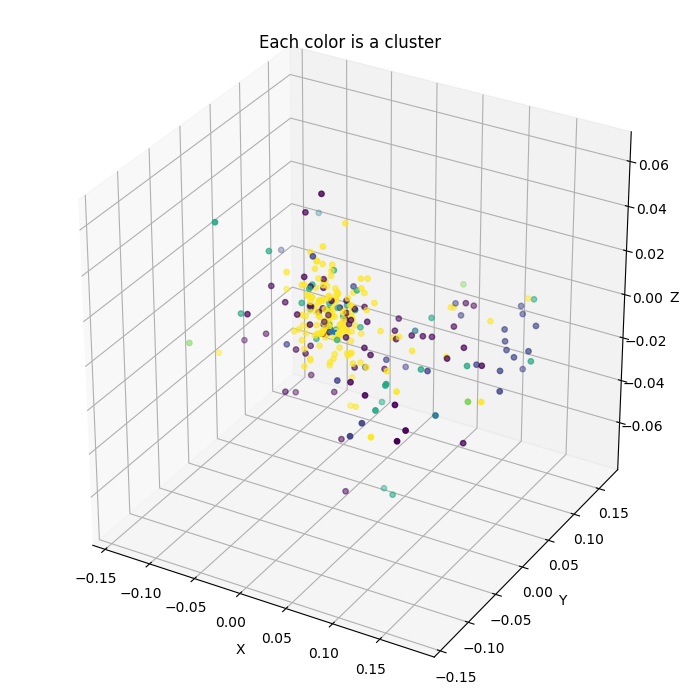

In [15]:
#Clustering con K-means
Vel_union21_clust = KMeans(n_clusters=6,max_iter=1000,precompute_distances=True,random_state=8,tol=1e-9).fit(Vel_union21.reshape(-1,1))
clusters = Vel_union21_clust.labels_
#clusters

#Dando color a los clusters
cor = [Xs,Ys,Zs]
graph_clusters(cor,clusters,1)

Debido a las caracteristicas aleatorias del K-means, al correr el calculo del clustering cada ves se optienen
clusters que en principio lucen diferentes. Aunque luego de correrlo varias veces se logra notar un cierto 
comportamiento comun en todos los clusters. Para manener un mismo resultado se usa una semilla (random_state)

# Clasificación con Hierarchical Clustering

Se usa el algoritmo por agrupacion de Hierarchichal clustering para hacer la clasificacion de las supernovas

In [16]:
HC_union21 = linkage(Vel_union21.reshape(-1,1),'ward')

In [17]:
#for i in xrange(len(HC_union21)):print HC_union21[i,2]

<IPython.core.display.Javascript object>


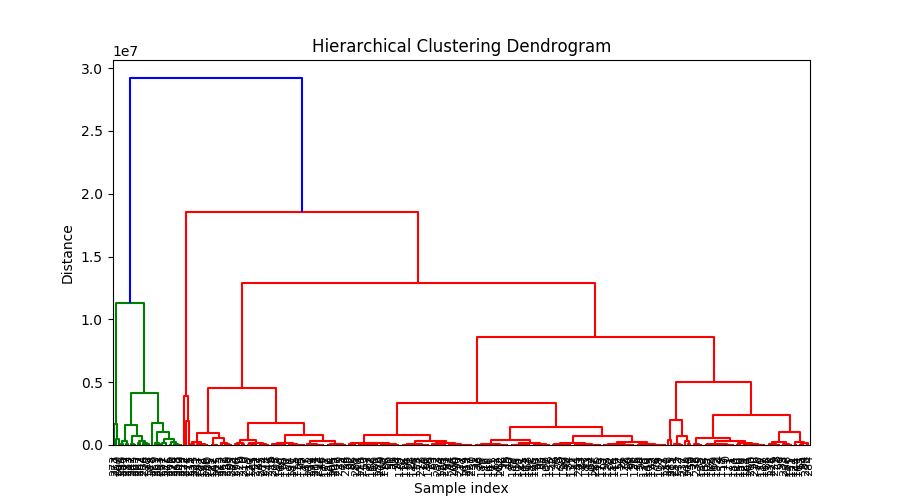

In [18]:
#Dendograma
plt.figure(figsize=(9, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
a=dendrogram(
    HC_union21,
    #truncate_mode='lastp',
    #p=100,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    #show_contracted=True, 
)

In [19]:
dist1 = 0.02
clustersH1 = fcluster(HC_union21,dist1,criterion='distance')
np.savetxt('ClusteringH1.txt',clustersH1,fmt='%.1f')
len(clustersH1)

288

<IPython.core.display.Javascript object>


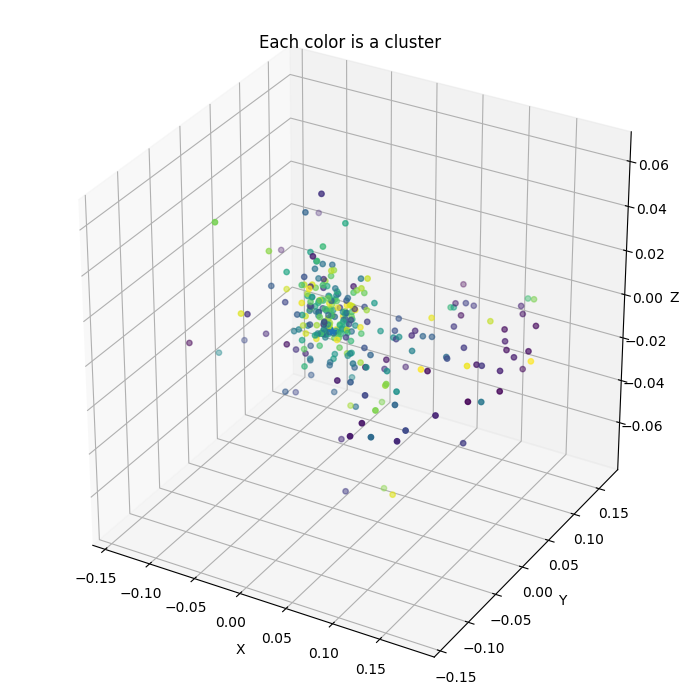

In [20]:
graph_clusters(cor,clustersH1,1)

In [21]:
#A dats se le debe dar el formato: dats.reshape(-1,1) de no tenerlo.
#method es el metodo usado por linkage para medir las distancias.
#y se debe pasar este argumento como 'method'.
#Para ver la opciones visitar:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
#name es el nombre con el cual se guardara el resultado del cluster

def Hierarchical_Clustering(dats,cord,dist,method,name='optionaltl.txt'):
    #Aplicando Hierarchical clustering de manera acoglomerativa
    HC_ = linkage(dats,method)
    
    #Dendograma
    plt.figure(figsize=(9, 5))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Sample index')
    plt.ylabel('Distance')
    a=dendrogram(
        HC_,
        #truncate_mode='lastp',
        #p=100,
        leaf_rotation=90.,                   # rotates the x axis labels
        leaf_font_size=8.,                   # font size for the x axis labels
        #show_contracted=True,
    ) 
    
    #Clustering desde una distancia dada en el dendograma
    #Se puede guardar los datos (opcional)
    clustersH1_ = fcluster(HC_,dist,criterion='distance')
    if name != 'optionaltl.txt': 
        np.savetxt(name,clustersH1_,fmt='%.1f')
    
    #Grafico de los clusters
    graph_clusters(cord,clustersH1_,0)
    
    #Informacion 
    print "Length = ",len(clustersH1_)
    print "The number of clusters is =", max(clustersH1_),",taken from the distance ", dist
    print "with the method", method
    
    return [HC_,clustersH1_]
        

<IPython.core.display.Javascript object>


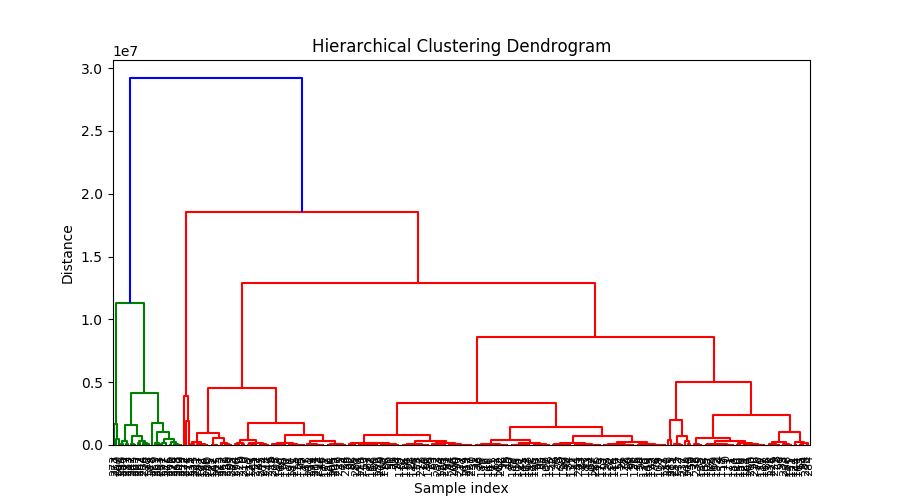

<IPython.core.display.Javascript object>


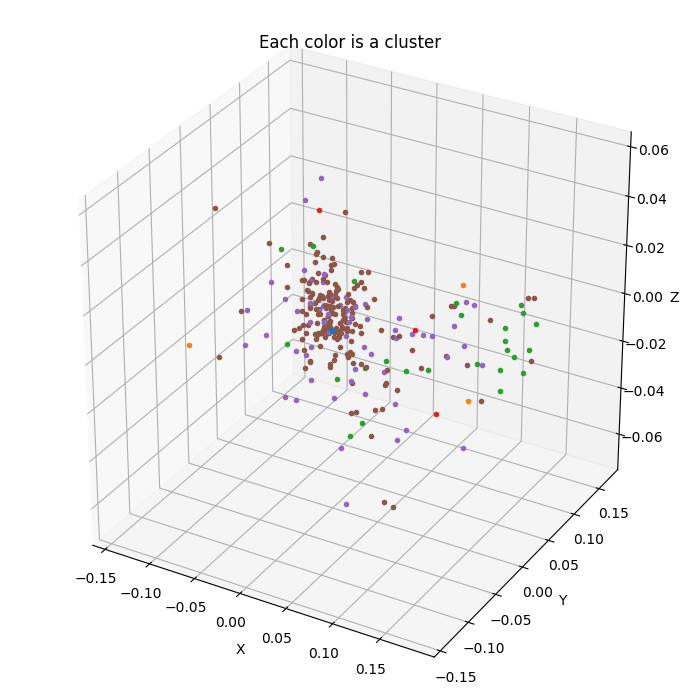

Length =  288
The number of clusters is = 5 ,taken from the distance  10000000.0
with the method ward


In [22]:
H_ward = Hierarchical_Clustering(Vel_union21.reshape(-1,1),cor,1e7,'ward','ClusteringH1_ward.txt')

<IPython.core.display.Javascript object>


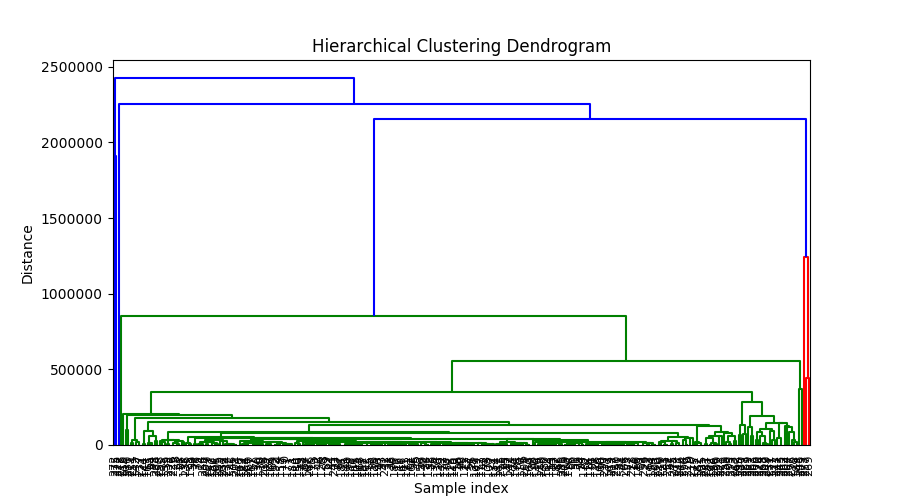

<IPython.core.display.Javascript object>


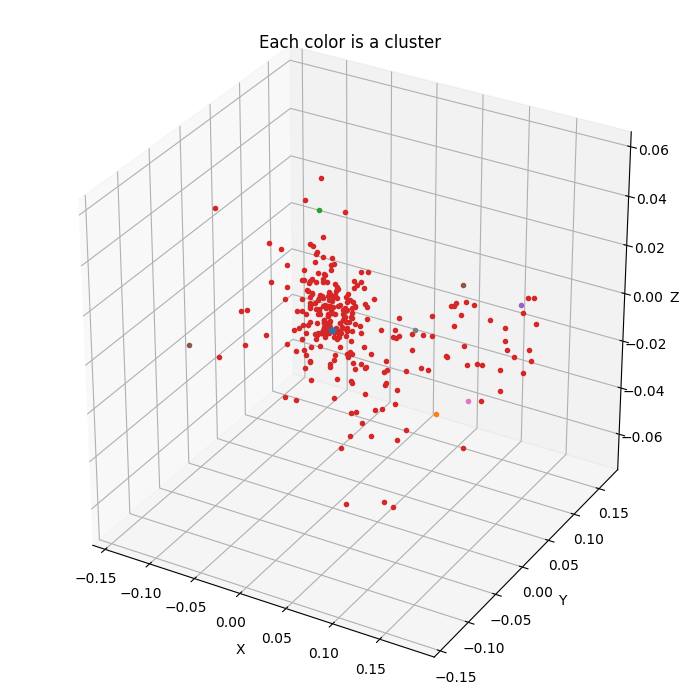

Length =  288
The number of clusters is = 7 ,taken from the distance  800000.0
with the method single


In [23]:
H_single = Hierarchical_Clustering(Vel_union21.reshape(-1,1),cor,0.8e6,'single','ClusteringH1_single.txt')

<IPython.core.display.Javascript object>


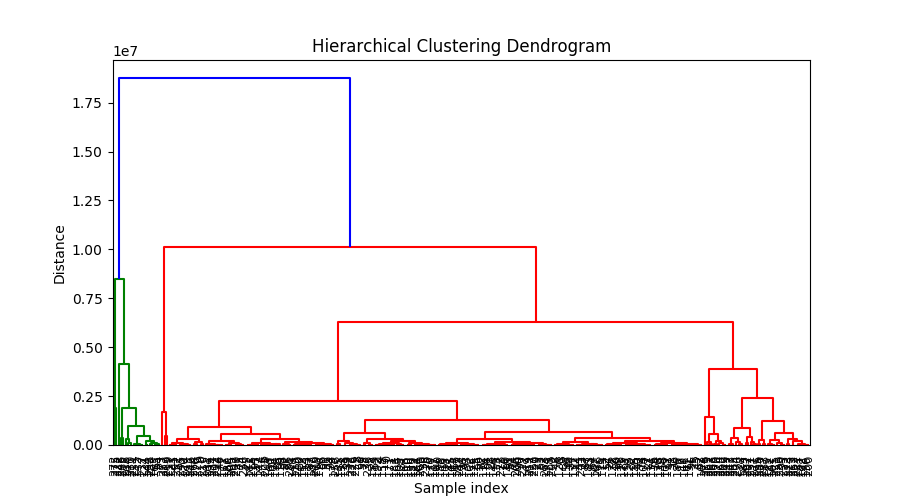

<IPython.core.display.Javascript object>


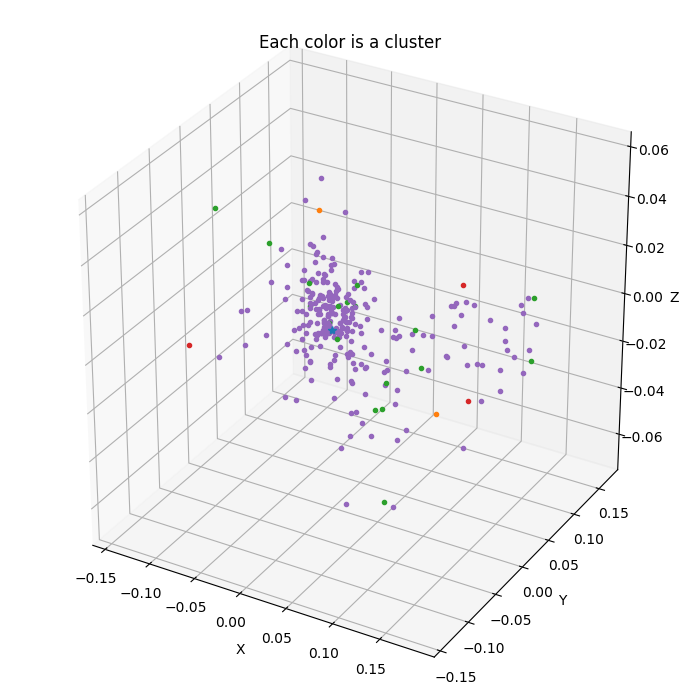

Length =  288
The number of clusters is = 4 ,taken from the distance  8000000.0
with the method complete


In [24]:
H_complete = Hierarchical_Clustering(Vel_union21.reshape(-1,1),cor,0.80e7,'complete','ClusteringH1_complete.txt')

<IPython.core.display.Javascript object>


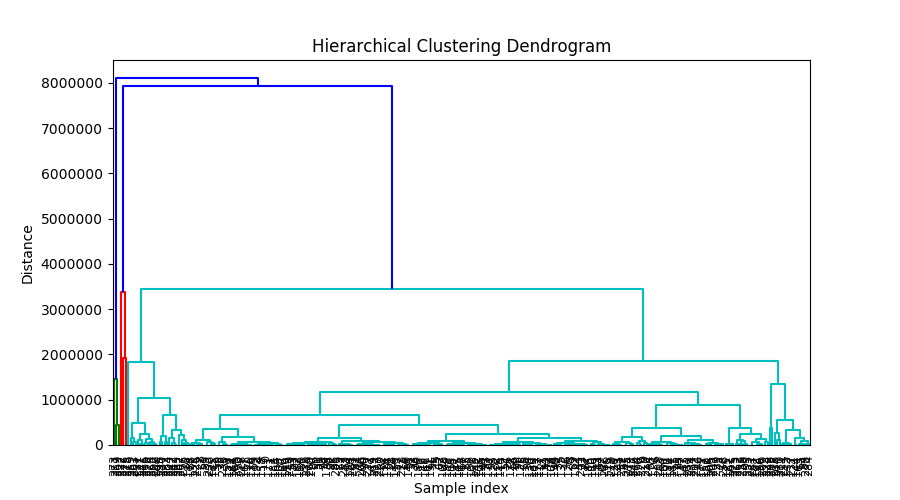

<IPython.core.display.Javascript object>


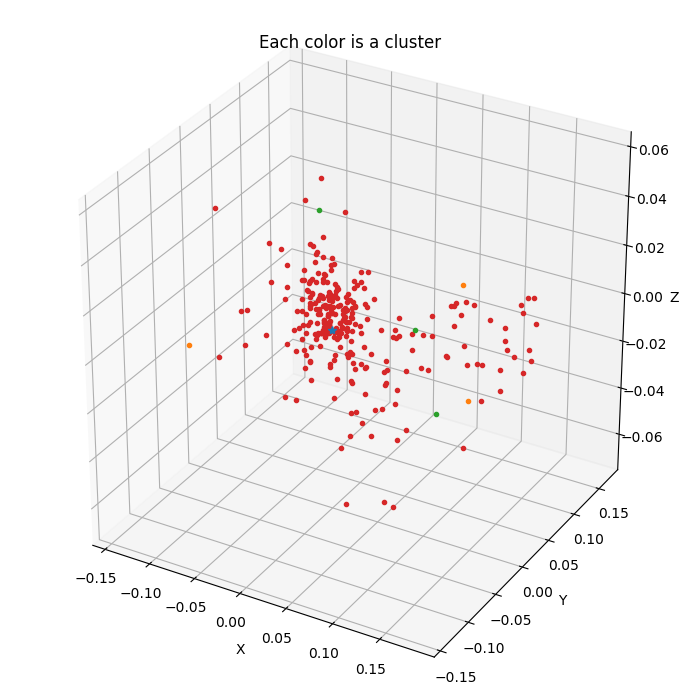

Length =  288
The number of clusters is = 3 ,taken from the distance  5000000.0
with the method average


In [25]:
H_average = Hierarchical_Clustering(Vel_union21.reshape(-1,1),cor,0.5e7,'average','ClusteringH1_average.txt')

<IPython.core.display.Javascript object>


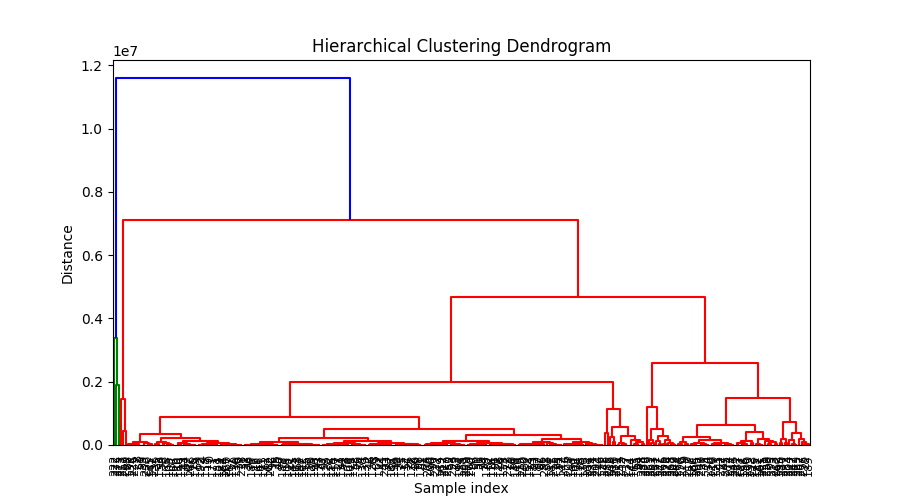

<IPython.core.display.Javascript object>


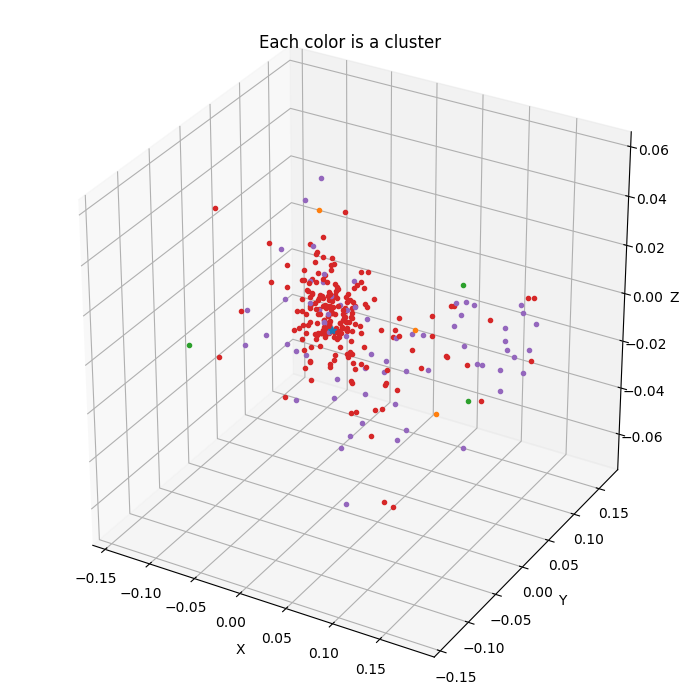

Length =  288
The number of clusters is = 4 ,taken from the distance  4000000.0
with the method weighted


In [26]:
H_weighted = Hierarchical_Clustering(Vel_union21.reshape(-1,1),cor,0.4e7,'weighted','ClusteringH1_weighted.txt')

<IPython.core.display.Javascript object>


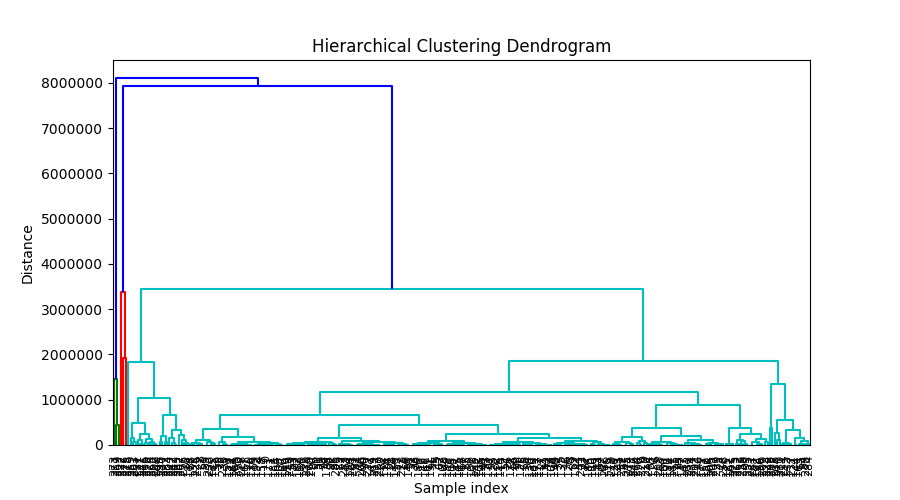

<IPython.core.display.Javascript object>


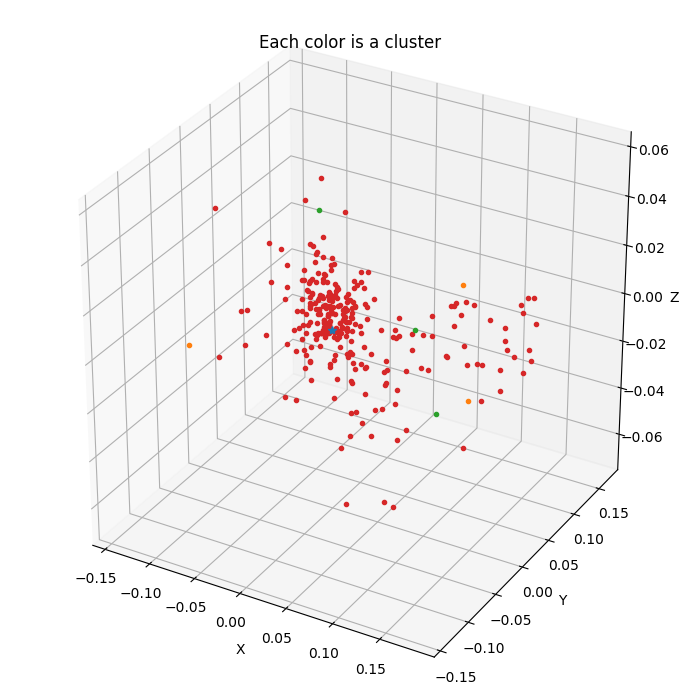

Length =  288
The number of clusters is = 3 ,taken from the distance  4000000.0
with the method centroid


In [27]:
H_centroid = Hierarchical_Clustering(Vel_union21.reshape(-1,1),cor,0.4e7,'centroid','ClusteringH1_centroid.txt')

<IPython.core.display.Javascript object>


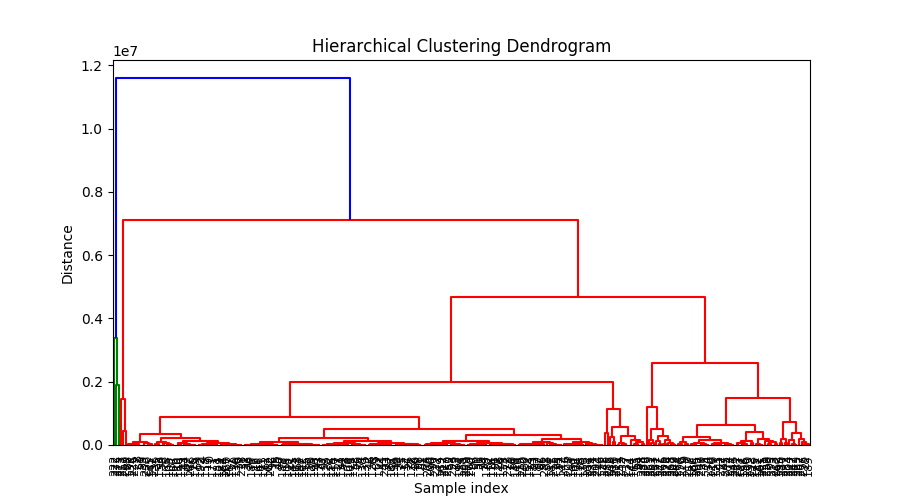

/home/brayan/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


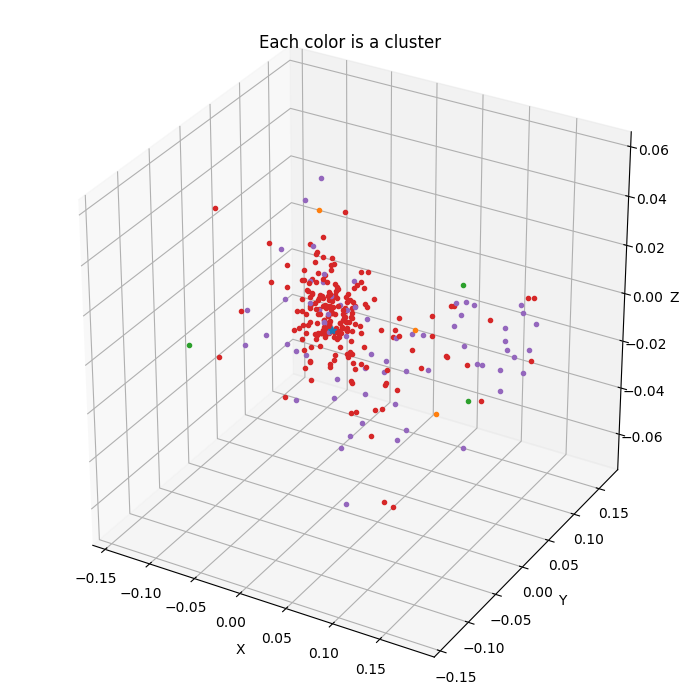

Length =  288
The number of clusters is = 4 ,taken from the distance  4000000.0
with the method median


In [28]:
H_median = Hierarchical_Clustering(Vel_union21.reshape(-1,1),cor,0.4e7,'median','ClusteringH1_median.txt')

# M2++

In [29]:
#Code from http://cosmicflows.uwaterloo.ca/download.html
# LG is in central voxel at 128,128,128
d = np.load('twompp_density.npy')
print "Overdensity at LG is:", d[128,128,128]

v = np.load('twompp_velocity.npy')

vlg = v[:,128,128,128]
print "LG's motion in Galactic:", vlg
print "Velocity:", np.sqrt(vlg.dot(vlg)), "km/s"

Overdensity at LG is: 0.291859651428
LG's motion in Galactic: [  66.16449308 -576.26093721  402.53849541]
Velocity: 706.039409803 km/s


In [30]:
"""
COOR = []
VELS = []
DENS = []
"""

'\nCOOR = []\nVELS = []\nDENS = []\n'

In [31]:
v[:,1,2,3]

array([ 100.7395354 , -130.36444218,   22.7242868 ])

In [32]:
"""
for i in xrange(0,257):
    for j in xrange(0,257):
        for k in xrange(0,257):
            VELS.append( list(v[:,i,j,k]) )
            COOR.append([(i-128)*400.0/256.0,(j-128)*400.0/256.0,(k-128)*400.0/256.0])
            DENS.append(d[i,j,k])
"""

'\nfor i in xrange(0,257):\n    for j in xrange(0,257):\n        for k in xrange(0,257):\n            VELS.append( list(v[:,i,j,k]) )\n            COOR.append([(i-128)*400.0/256.0,(j-128)*400.0/256.0,(k-128)*400.0/256.0])\n            DENS.append(d[i,j,k])\n'

In [33]:
"""
np.savetxt('M2COOR',COOR)
np.savetxt('M2VELS',VELS)
np.savetxt('M2DENS',DENS)
"""

"""
np.save('M2COOR.npy',COOR)
np.save('M2VELS.npy',VELS)
np.save('M2DENS.npy',DENS)
"""

"\nnp.save('M2COOR.npy',COOR)\nnp.save('M2VELS.npy',VELS)\nnp.save('M2DENS.npy',DENS)\n"

In [34]:
"""
COOR = np.loadtxt('M2COOR.txt',dtype=np.float32)
VELS = np.loadtxt('M2VELS.txt',dtype=np.float32)
DENS = np.loadtxt('M2DENS.txt',dtype=np.float32)
"""
COOR = np.load('M2COOR.npy')
VELS = np.load('M2VELS.npy')
DENS = np.load('M2DENS.npy')

#The point where X,Y,Z are zero corresponds to the point where i,j,k=128
print len(VELS)
print int(257**3/2.0), VELS[8487296], DENS[8487296], COOR[8487296]
print min(DENS),max(DENS)

16974593
8487296 [  66.16448975 -576.26092529  402.53848267] 0.29186 [ 0.  0.  0.]
-1.0 53.5739


In [35]:
#Clustering M2++

In [36]:
"""
print sys.getsizeof(COO),sys.getsizeof(VEL),sys.getsizeof(DEN)
print COO.nbytes, VEL.nbytes, DEN.nbytes
"""

'\nprint sys.getsizeof(COO),sys.getsizeof(VEL),sys.getsizeof(DEN)\nprint COO.nbytes, VEL.nbytes, DEN.nbytes\n'

In [37]:
"""
Vs = list()
Cs = list()
Ds = list()
"""

'\nVs = list()\nCs = list()\nDs = list()\n'

In [38]:
"""
for i in xrange(len(DENS)):
    if DENS[i] != 0.0:
        Vs.append(list(VELS[i]))
        Cs.append(list(COOR[i]))
        Ds.append(DENS[i])
"""

'\nfor i in xrange(len(DENS)):\n    if DENS[i] != 0.0:\n        Vs.append(list(VELS[i]))\n        Cs.append(list(COOR[i]))\n        Ds.append(DENS[i])\n'

In [39]:
"""
np.save("Vs_nonzero_den",Vs)
np.save("Cs_nonzero_den",Cs)
np.save("Ds_nonzero_den",Ds)
"""
Vs_nz = np.load("Vs_nonzero_den.npy")
Cs_nz = np.load("Cs_nonzero_den.npy")
Ds_nz = np.load("Ds_nonzero_den.npy")

In [40]:
#V_r of M2++, done by proyecting the v vector in the direction of the r unit vector.

In [41]:
#"""
#Proyection of the velocity of each galaxy in our direction using the (-)unitary vector
#obtained from the position of the galaxy in galatic comoving coordinates.
Vr = []
for i in xrange(len(VELS)):
    Vr.append( VELS[i].dot(-1.0*COOR[i]/np.sqrt(COOR[i].dot(COOR[i]) ) ) )
#"""

/home/brayan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in divide
  


In [42]:
#"""
np.save('VrM2.npy',Vr)
#"""
Vr = np.load('VrM2.npy')

In [43]:
VELR = np.concatenate( (Vr[:8487296],np.array([0]),Vr[8487297:]) )

In [44]:
print VELS[3600], Vr[3600]

[ 100.99488831 -131.96417236   22.56006241] 3.41269


In [46]:
"""
#Ploting the galaxies.
XM2 = []
YM2 = []
ZM2 = []

for i in xrange(len(COOR)):
    XM2.append(COOR[i][0])
    YM2.append(COOR[i][1])
    ZM2.append(COOR[i][2])

"""

<IPython.core.display.Javascript object>


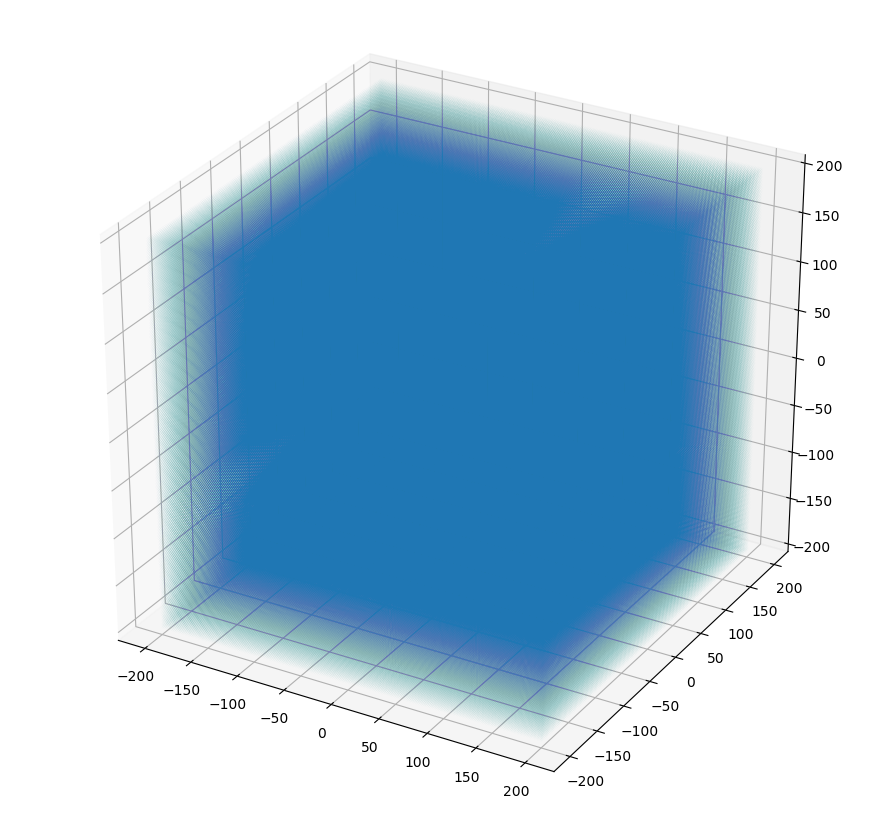

In [66]:
"""
fig = plt.figure(figsize=(15,15))
ax = Axes3D(fig)
ax.plot(XM2,YM2,ZM2,'.',markersize=0.01)
"""

In [47]:
"""
X2M_non = list()
Y2M_non = list()
Z2M_non = list()
"""

In [48]:
"""
for i in xrange(len(Vs_nz)):
    X2M_non.append(Cs_nz[i][0])
    Y2M_non.append(Cs_nz[i][1])
    Z2M_non.append(Cs_nz[i][2])
"""

<IPython.core.display.Javascript object>


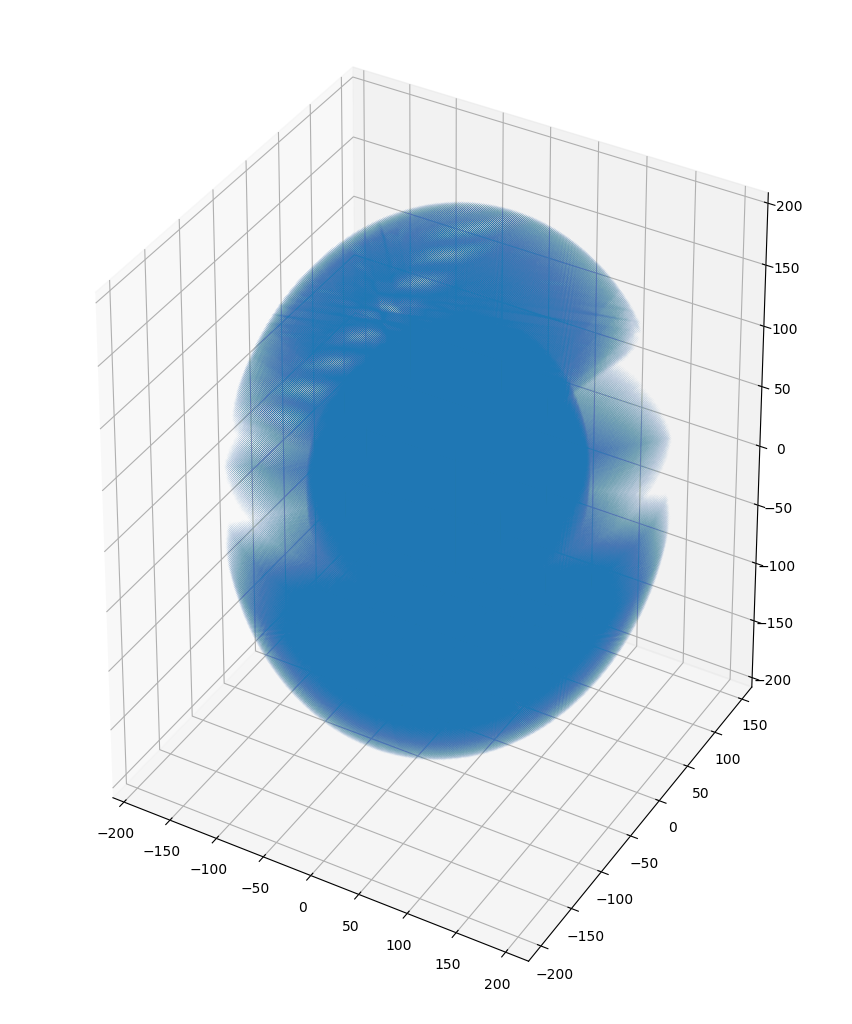

In [64]:
"""
fig2 = plt.figure(figsize=(12,12))
ax = Axes3D(fig2)
ax.plot(X2M_non,Y2M_non,Z2M_non,'.',markersize=0.02)
"""

In [45]:
len(Cs_nz)

6021155

In [ ]:
#kmeansden = KMeans(n_clusters=6,max_iter=1000,precompute_distances=True,random_state=8,tol=1e-9).fit(DEN.reshape(-1,1))

In [ ]:
#kmeansVr = KMeans(n_clusters=6,max_iter=1000,precompute_distances=True,random_state=8,tol=1e-9).fit(Vrr.reshape(-1,1))

In [43]:
#kmeansV3D1 = KMeans(n_clusters=6,max_iter=1000,precompute_distances=True,random_state=8,tol=1e-9).fit(VEL[0:1000000])

In [44]:
#kmeansV3D2 = KMeans(n_clusters=6,max_iter=1000,precompute_distances=True,random_state=8,tol=1e-9).fit(VEL[0:10000000])

In [45]:
#kmeansV3D3 = KMeans(n_clusters=6,max_iter=1000,precompute_distances=True,random_state=8,tol=1e-9).fit(VEL[0:12000000])

In [46]:
#HC_2MVr = linkage(VELR.reshape(-1,1),'ward')

In [49]:
#VELS[0:10]

In [46]:
print max(dist_z_union21),min(dist_z_union21)

992941118.269 13307472.1013


# DBSCAN

In [47]:
#Transformando Union21 (RAC y DEC) a coordenadas comoviles cartesianas

In [45]:
#Distancia comovil
D_ = []
for i in xrange(len(z_union)):
    D_.append(Dist_com(z_union[i]))
    #D_.append(Dist_fz(z_union[i]))
    
D_c = np.array(D_)

In [46]:
#Coordenadas comoviles X_c, Y_c, Z_c
X_c = D_c*np.sin(conv*(90.0-DEC))*np.cos(conv*ACR)
Y_c = D_c*np.sin(conv*(90.0-DEC))*np.sin(conv*ACR)
Z_c = D_c*np.cos(conv*(90.0-DEC))

In [47]:
#Dividido entre 1e6 para dar resultado en Mpc
COOR_c = []
R_c = []
for i in xrange(len(D_c)):
    COOR_c.append([X_c[i]/1e6,Y_c[i]/1e6,Z_c[i]/1e6])
    R_c.append( np.sqrt( X_c[i]**2.0 + Y_c[i]**2.0 + Z_c[i]**2 )/1e6 )
    
COOR_c = np.array(COOR_c)
R_c = np.array(R_c)

In [48]:
#Union21Grup_DBSCAN = DBSCAN(eps=100, min_samples=3).fit(COOR_c)

In [49]:
#Union21Grup_DBSCAN.labels_

In [50]:
#M2Grup_DBSCAN = DBSCAN(eps=2, min_samples=5).fit(COOR)

# Comparing 2M++ and Union2.1

We are now going to asign to each Union21 coordinate a velocity vector by comparing with
the 2M++ catalogue. For each point in Union21 we will choose the closest point in 2M++
and then we asign to this point the velocity vector and density contrast for comparing them 
later. 

In [51]:
def Closest_point(point,list_coor):
    return list_coor[ distance.cdist([point],list_coor).argmin() ]

#Error de la distancia calculada con el modulo de la distancia.
def Err_dist_mod(Dis_, Err_):
    error_ = np.log(10.0)*np.array(Dis_)*np.array(Err_)/5.0           #Valor de error en la distancia
    error_porc = 100*np.array(error_)/np.array(Dis_)                  #Valor porcentual del error
    return [error_,error_porc]

#Error in the dist mod
EDisMo = Err_dist_mod(dist_mu_union21,dist_mod_unionE)
min(EDisMo[1]), max(EDisMo[1])

(3.8749801117088509, 34.078259376311877)

In [52]:
#Comparing the Union2.1 and 2M++ data sets
Vel_U2M = []                 #Here is storaged the velocities  from 2M++
Cor_U2M_2 = []               #Here is storaged the coordinates from 2M++
Cor_U2M_u = []               #Here is storaged the coordinates from Union2.1
VeR_U2M = []                 #Here is storaged the r_velocity from 2M++
VeR_U2M_union = []           #Here is storaged the r_velocity from Union2.1
Den_U2M = []                 #Here is storaged the density contrast from 2M++

Red_U2M_union = []           #Here is storaged the redshift from Union2.1
Dist_z_union = []            #Here is storaged the the physical distance using the redshift from Union2.1
Dist_mu_union = []           #Here is storaged the the physical distance using the dist mod from Union2.1
Dist_muE_union = []          #Here is storaged the the error in the physical distance compute by the dist mod

#Criterio de cercania, se aplica a cada componente del vector de posiciones
crit = 0.55
for i in xrange(len(COOR_c)):
    Indx = distance.cdist([COOR_c[i]],COOR).argmin()
    if abs(COOR_c[i][0]-COOR[Indx][0])<crit and abs(COOR_c[i][1]-COOR[Indx][1])<crit and abs(COOR_c[i][2]-COOR[Indx][2])<crit:
        #Giving to each Union2.1 r_velocity a velocity vector based in the closest point in 2M++ catalogue
        Vel_U2M.append( list(VELS[ Indx ]) )
        
        #We storaged the coordinaties from Union2.1 for later comparition
        Cor_U2M_2.append( list(COOR[ Indx ]) )
        Cor_U2M_u.append( list(COOR_c[i]) )
        
        VeR_U2M.append( VELR[ Indx ] )
        VeR_U2M_union.append( Vel_union21[i] )
        
        Den_U2M.append( DENS[ Indx ] )
        Red_U2M_union.append(z_union[i])
        Dist_z_union.append(dist_z_union21[i])
        Dist_mu_union.append(dist_mu_union21[i])
        Dist_muE_union.append(EDisMo[0][i])
        
        
#The velocities from 2M++ are in Km/s, from Union2.1 in m/s
VeR_U2M_union = np.array(VeR_U2M_union)/1000.0
VeR_U2M = np.array(VeR_U2M)

In [53]:
min(Red_U2M_union)

0.0050000000000000001

In [54]:
num = 8
print len(Vel_U2M), len(COOR_c)
print Cor_U2M_u[num],Cor_U2M_2[num]
print np.sqrt(np.array(Cor_U2M_u[num]).dot(np.array(Cor_U2M_u[num])))
print np.sqrt(np.array(Cor_U2M_2[num]).dot(np.array(Cor_U2M_2[num])))

77 288
[42.445630817200957, -5.8705646349061862, 17.685376278822496] [42.1875, -6.25, 17.1875]
46.3558803036
45.9811


In [55]:
#Making a plot with the 2M++ points got by comparing with the Union2.1 data set.
Xs_U2M_2 = list()
Ys_U2M_2 = list()
Zs_U2M_2 = list()

Xs_U2M_u = list()
Ys_U2M_u = list()
Zs_U2M_u = list()


for i in xrange(len(Cor_U2M_2)):
    Xs_U2M_2.append(Cor_U2M_2[i][0])
    Ys_U2M_2.append(Cor_U2M_2[i][1])
    Zs_U2M_2.append(Cor_U2M_2[i][2])

    Xs_U2M_u.append(Cor_U2M_u[i][0])
    Ys_U2M_u.append(Cor_U2M_u[i][1])
    Zs_U2M_u.append(Cor_U2M_u[i][2])

<IPython.core.display.Javascript object>


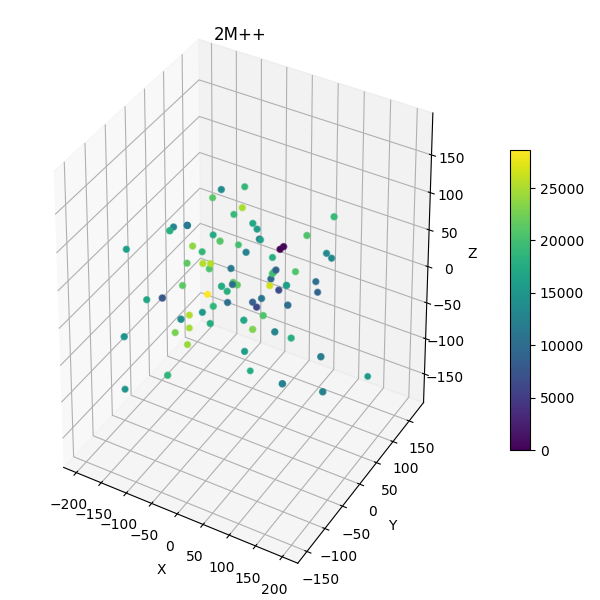

In [56]:
cm = plt.get_cmap("RdYlGn")
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)

#Asignacion de colores:
Col_2 = []
for i in xrange(len(VeR_U2M)):
    C0 = VeR_U2M[i]-min(VeR_U2M)
    Col_2.append( (30*C0) )

vel_2_plot = ax.scatter3D(Xs_U2M_2,Ys_U2M_2,Zs_U2M_2,'*',c=Col_2,s=20)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('2M++')
fig.colorbar(vel_2_plot, shrink=0.5, aspect=15)

<IPython.core.display.Javascript object>


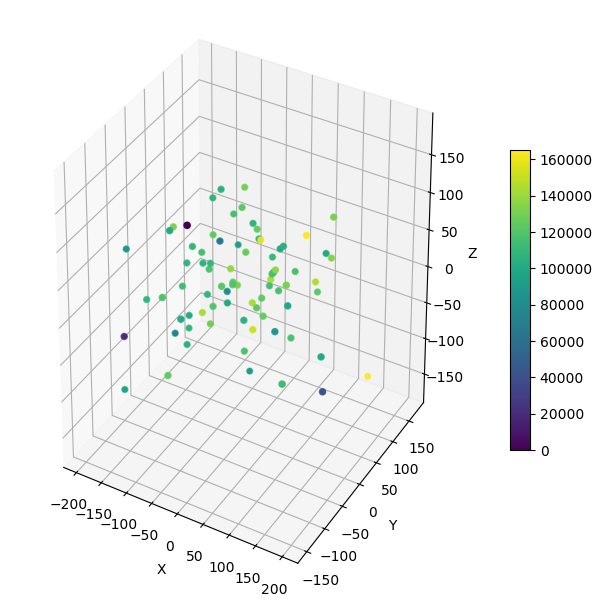

In [57]:
cm = plt.get_cmap("RdYlGn")
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)

#Asignacion de colores:
Col_u = []
for i in xrange(len(VeR_U2M_union)):
    C0 = VeR_U2M_union[i]-min(VeR_U2M_union)
    Col_u.append( (30*C0) )

vel_u_plot = ax.scatter3D(Xs_U2M_u,Ys_U2M_u,Zs_U2M_u,'*',c=Col_u,s=20)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
fig.colorbar(vel_u_plot, shrink=0.5, aspect=15)

In [58]:
#for i in xrange(len(Vel_U2M)):
#    print max(abs(Cor_U2M_u[i][0]-Cor_U2M_2[i][0]),abs(Cor_U2M_u[i][1]-Cor_U2M_2[i][1]),abs(Cor_U2M_u[i][2]-Cor_U2M_2[i][2]))

In [59]:
#Fit by using curve_fit
def Ajuste2M_Union(x,a,b):
    return a*x + b
popt,pcov = curve_fit(Ajuste2M_Union,VeR_U2M_union,VeR_U2M)
print popt
print pcov
print np.sqrt(pcov)

[  3.95038390e-03   7.11650881e+01]
[[  6.28621946e-04   2.00322427e-01]
 [  2.00322427e-01   5.53472333e+02]]
[[  0.02507233   0.44757394]
 [  0.44757394  23.52599271]]


<IPython.core.display.Javascript object>


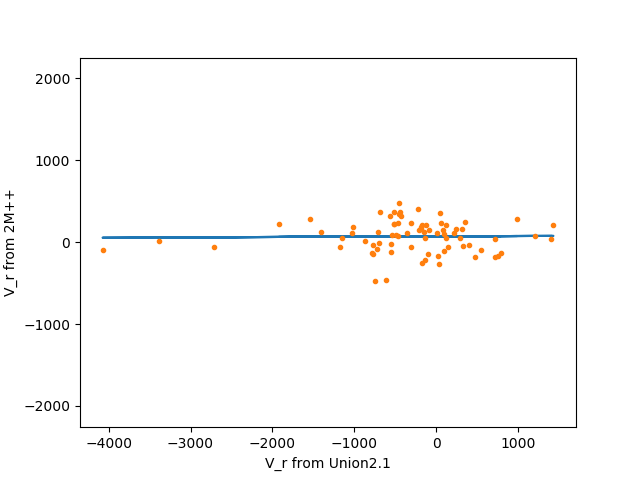

(-4350.0388003897178,
 1708.0887255482653,
 -527.93271179199223,
 522.13632507324223)

In [60]:
fig = plt.figure()
plt.plot(VeR_U2M_union,Ajuste2M_Union(VeR_U2M_union,popt[0],popt[1]))
plt.plot(VeR_U2M_union,VeR_U2M,'.')
plt.xlabel('V_r from Union2.1')
plt.ylabel('V_r from 2M++')
plt.axis('equal')
plt.axis('equal')

In [61]:
#Now we make the fit by using scipy.stats.linregress, it returns the p and r values.

In [62]:
adj_vel_stats = sp.stats.linregress(VeR_U2M_union,VeR_U2M)

In [63]:
adj_vel_stats

LinregressResult(slope=0.003950382957423523, intercept=71.165087760284834, rvalue=0.018190386620272767, pvalue=0.87522738932161959, stderr=0.025072334531532348)

In [64]:
#Email
#si la pendiente es zero, restando la diferencia (el promedio) se supone que se obtenga una 
#fuerte correlacion, intenta restar el termino constante del fit y hacer el fit sobre eso

vel_ave = np.average(VeR_U2M_union)
print vel_ave
"""
VeR_U2M_union_ave = VeR_U2M_union - vel_ave
VeR_U2M_ave = VeR_U2M - vel_ave
print vel_ave
"""

-318.669175664


'\nVeR_U2M_union_ave = VeR_U2M_union - vel_ave\nVeR_U2M_ave = VeR_U2M - vel_ave\nprint vel_ave\n'

In [65]:
adj_vel_stats_fit_u = sp.stats.linregress(VeR_U2M_union - popt[1] ,VeR_U2M)
adj_vel_stats_fit_2 = sp.stats.linregress(VeR_U2M_union ,VeR_U2M - popt[1])
print adj_vel_stats_fit_u
print adj_vel_stats_fit_2

LinregressResult(slope=0.0039503829574235247, intercept=71.446217111458836, rvalue=0.018190386620272777, pvalue=0.87522738932161948, stderr=0.025072334531532348)
LinregressResult(slope=0.0039503829574235212, intercept=-3.3470498217447187e-07, rvalue=0.018190386620272756, pvalue=0.8752273893216197, stderr=0.025072334531532348)


In [66]:
#dif_vel = [abs( abs(VeR_U2M[i])-abs(VeR_U2M_union[i])) for i in xrange(len(VeR_U2M_union))]
dif_vel = [abs( VeR_U2M[i] - VeR_U2M_union[i]) for i in xrange(len(VeR_U2M_union))]

In [67]:
print min(dif_vel), max(dif_vel), np.average(dif_vel)

10.8155234309 3982.98823794 696.066147437


In [68]:
#Analysing the sign in v_r from both, Union2.1 an 2M++ data sets
VeR_sig_u = np.sign(VeR_U2M_union)
VeR_sig_2 = np.sign(VeR_U2M)

signs = [1 for i in xrange(len(VeR_U2M)) if VeR_sig_2[i]==VeR_sig_u[i]]
print 'There are',len(VeR_U2M),'points and',round(len(signs)/(1.0*len(VeR_U2M))*100,2) ,'% have the same sign in v_r'

There are 77 points and 42.86 % have the same sign in v_r


In [69]:
print np.average(VeR_U2M), np.average(VeR_U2M_union)
print np.average(VeR_U2M-popt[1]), np.average(VeR_U2M_union)

69.9062224797 -318.669175664
-1.25886561531 -318.669175664


In [70]:
Zss = z_union
Dss = dist_mu_union21
err_Dss = EDisMo[0]

In [71]:
"""
We don't have uncertainities in these values. They are harder to compute than the values themselves.
In general they will depend on distance from the origin and location within the data volume (proximity to an edge). 
A lower limit on the uncertainty is 150 km/s, applicable near the origin. 
At large radii this will increase perhaps to as much as 300 km/s near the edge (at R ~ 200 Mpc/h)
"""

"\nWe don't have uncertainities in these values. They are harder to compute than the values themselves.\nIn general they will depend on distance from the origin and location within the data volume (proximity to an edge). \nA lower limit on the uncertainty is 150 km/s, applicable near the origin. \nAt large radii this will increase perhaps to as much as 300 km/s near the edge (at R ~ 200 Mpc/h)\n"

In [72]:
#Ajuste datos de Union y 2M++
#xss = VeR_U2M_union, yss = VeR_U2M
C = 299792458.0*1e-3
div_err = np.array(Dist_z_union)*np.array(Dist_muE_union)/np.array(Dist_mu_union)**2.0
ErrVr_union = C*np.array(Red_U2M_union)*np.array(div_err)
#ErrVr_2M = np.zeros_like(ErrVr_union)

#"""
#These are the errors for the velocities in 2M++, computed according to the Mr Hundson's email 
Rs_2 = []
for i in xrange(len(Cor_U2M_2)):
    Rs_2.append( np.sqrt(np.array(Cor_U2M_2[i]).dot(np.array(Cor_U2M_2[i]))) )
    
ErrVr_2M = 3*np.array(Rs_2)/4.0 + 150.0
#"""

def chisqfunc2_Union_2M((a, b)):
    model = a*np.array(VeR_U2M_union) + b
    chisq = np.sum( ( (VeR_U2M - model)/np.sqrt(ErrVr_union**2 + ErrVr_2M**2) )**2 )
    return chisq

x0 = np.array([0,60.0])
result =  sp.optimize.minimize(chisqfunc2_Union_2M, x0)
print result

      fun: 10.659018956852336
 hess_inv: array([[  5.26444469e-03,   3.59017651e-01],
       [  3.59017651e-01,   2.01338082e+03]])
      jac: array([ -1.19209290e-07,   0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 40
      nit: 4
     njev: 10
   status: 0
  success: True
        x: array([ -5.21163060e-02,   6.80142495e+01])


In [84]:
#ErrVr_union

<IPython.core.display.Javascript object>


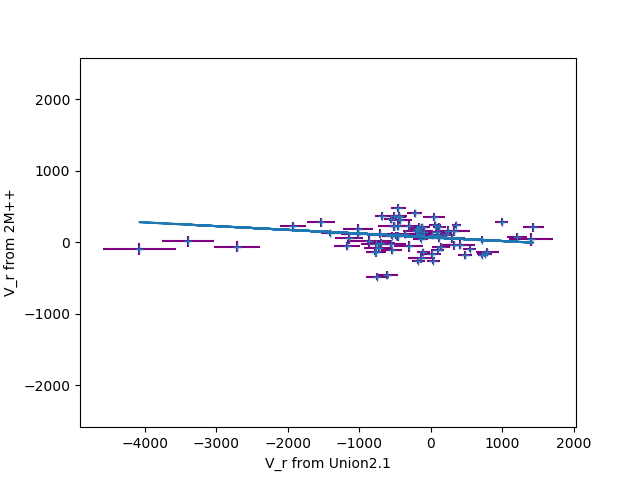

(-4904.8785318953796,
 2029.958405049633,
 -586.20810432434087,
 579.80476112365727)

In [74]:
# example data
fig, ax = plt.subplots()
plt.plot(VeR_U2M_union,Ajuste2M_Union(VeR_U2M_union,result.x[0],result.x[1]))
ax.errorbar(VeR_U2M_union,VeR_U2M, xerr=0.25*ErrVr_union, yerr=0.25*ErrVr_2M,fmt='+',ecolor='purple')
plt.xlabel('V_r from Union2.1')
plt.ylabel('V_r from 2M++')
plt.axis('equal')
plt.axis('equal')

In [75]:
#For small Z the relationship between this one and the distance is lineal (d=cZ/H0)
#using c in Km/seg and the distance in pc we obtain H0 in Km/seg*pc
def linearH0_z(zH0,pend):
    return pend*zH0
poptH0, pcovH0 = curve_fit(linearH0_z,Zss,Dss)

#Km/s light
C = 299792458.0/1000.0 

#The slope is in pc's (because of the distance was calculated with dist mod) so for
#H0 in Km/seg*Mpc we need to divide the slope for 10^6
H0_adj = C/(poptH0[0]/1e6)
print H0_adj

63.2357852307


<IPython.core.display.Javascript object>


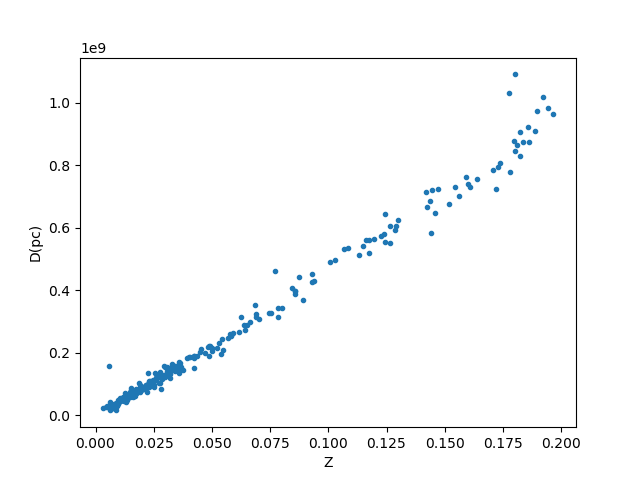

In [76]:
plt.figure()
plt.plot(Zss,Dss,'.')
plt.xlabel('Z')
plt.ylabel('D(pc)')

In [77]:
def Chi_sqrt_cosm((Om,Ol)):
    
    C = 299792458.0                       #C es la velocidad de la luz (m/s)
    H0 = 100e3                            #Cte de Hubble hoy en m/s/Mpc,Union2.1
    #H0 = 67.74e3                          #Cte de Hubble hoy en m/s/Mpc,Plank
    #H0 = 1e3*H0_adj 
    
    Chi_2 = []
    
    for i in xrange(len(Zss)):
        a_z  = 1.0/(1.0 + Zss[i])
        Dcom = 1e6*sp.integrate.quad(lambda Z_: C/(H0*(Om*(1.0+Z_)**3.0 + Ol)**0.5),0,Zss[i])[0]
        Dfis = Dcom*a_z
        
        Chi_2.append(( (Dss[i]-Dfis)/(1.0*err_Dss[i]) )**2.0)
        
    return np.sum(Chi_2)

In [78]:
#x0 are the initials values for the parameters
x0_cosm = [0.3,0.7]

#bnds are the limits over the parameters
#bnds = ((0.1, 1), (0.1,1 ))

#Cons is the condiction (as a dictionary) that Om+Ol=1, but we need to pass a function like f(x)=0 
#and say it is an equation ('eq') or inequality
def const1((Om,Ol)):
    return Om+Ol-1.0

#This is Om>=0
def const2((Om,Ol)):
    return Om + Ol

#This is Ol>=0
#def const3((Om,Ol)):return Ol

#The contraint as a ictionary
Cons1 = {'type': 'eq', 'fun': const1}
Cons2 = {'type': 'ineq', 'fun': const2}
#Cons3 = {'type': 'ineq', 'fun': const3}

Cons = ([Cons1,Cons2])

In [79]:
"""
result =  sp.optimize.minimize(Chi_sqrt_cosm, x0_cosm,constraints=Cons)
print result
"""

'\nresult =  sp.optimize.minimize(Chi_sqrt_cosm, x0_cosm,constraints=Cons)\nprint result\n'

In [80]:
"""
C = 299792458.0                      #C es la velocidad de la luz (m/s)
H0 = 67.74e3                         #Cte de Hubble hoy en m/s/Mpc,Plank
    
Dcom1 = 1e6*sp.integrate.quad(lambda Z_: C/(H0*(0.3*(1+Z_)**30 + 0.7)**0.5),0,Zss[1])[0]*(1+Zss[1])
"""

'\nC = 299792458.0                      #C es la velocidad de la luz (m/s)\nH0 = 67.74e3                         #Cte de Hubble hoy en m/s/Mpc,Plank\n    \nDcom1 = 1e6*sp.integrate.quad(lambda Z_: C/(H0*(0.3*(1+Z_)**30 + 0.7)**0.5),0,Zss[1])[0]*(1+Zss[1])\n'

In [81]:
"""
step = 20
OmegM = np.linspace(0.01,0.4,step)
OmegL = np.linspace(0.5,0.8,step)

chi2 = []
OmML = []

for i in xrange(len(OmegM)):
    for j in xrange(len(OmegL)):
        chi2.append( Chi_sqrt_cosm(OmegM[i],OmegL[j]) )
        OmML.append([OmegM[i],OmegL[j]])
"""

'\nstep = 20\nOmegM = np.linspace(0.01,0.4,step)\nOmegL = np.linspace(0.5,0.8,step)\n\nchi2 = []\nOmML = []\n\nfor i in xrange(len(OmegM)):\n    for j in xrange(len(OmegL)):\n        chi2.append( Chi_sqrt_cosm(OmegM[i],OmegL[j]) )\n        OmML.append([OmegM[i],OmegL[j]])\n'

In [82]:
"""
chi2_min = chi2[np.array(chi2).argmin()]
OmML_min = OmML[np.array(chi2).argmin()]
print chi2_min, OmML_min
"""

'\nchi2_min = chi2[np.array(chi2).argmin()]\nOmML_min = OmML[np.array(chi2).argmin()]\nprint chi2_min, OmML_min\n'

In [83]:
"""
def func2(x, y, z):
    return np.sin(y * x)+z

xaxis = np.linspace(0, 4, 4)
yaxis = np.linspace(-1, 1, 7)
zaxis = np.linspace(0, 1, 6)
result2 = func2(xaxis[:,None,None], yaxis[None,:,None],zaxis[None,None,:])
"""

'\ndef func2(x, y, z):\n    return np.sin(y * x)+z\n\nxaxis = np.linspace(0, 4, 4)\nyaxis = np.linspace(-1, 1, 7)\nzaxis = np.linspace(0, 1, 6)\nresult2 = func2(xaxis[:,None,None], yaxis[None,:,None],zaxis[None,None,:])\n'